In [117]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
iris = load_iris()

x_data=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y_data=pd.DataFrame(iris['target'],columns=['target'])

#### Preprocessing

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,
                                                 stratify=y_data)

ssc = StandardScaler()
x_train_ssc = ssc.fit_transform(x_train)
x_test_ssc = ssc.transform(x_test)

y_train=pd.get_dummies(y_train['target'])
y_test=pd.get_dummies(y_test['target'])

### Modeling
```
 1. tf_low
 2. tf_high
 3. torch_low
 4. torch_high
 ```

In [119]:
# 1 tf_low
import tensorflow as tf

#####

x = tf.constant(x_train_ssc, tf.float32)
y = tf.constant(y_train.values, tf.float32)

initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape=[x.shape[-1],
                             3]))
b = tf.Variable(initX(shape=[3]))

def cost():
    z = tf.matmul(x,w) + b
    c_i = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=z)
    c = tf.reduce_mean(c_i)
    return c

def hxFn(xdata):
    xd = tf.constant(xdata,tf.float32)
    z = tf.matmul(xd,w) + b
    hx = tf.nn.softmax(z)
    return (hx.numpy()>0.5) + 0

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

for i in range(200):
    optimizer.minimize(cost,var_list=[w,b])
    acc = accuracy_score(hxFn(x),y)
    print(f'epoch => {i} / cost => {cost().numpy()} / acc => {acc}')

epoch => 0 / cost => 1.8443573713302612 / acc => 0.19166666666666668
epoch => 1 / cost => 1.4476382732391357 / acc => 0.25
epoch => 2 / cost => 1.1130191087722778 / acc => 0.325
epoch => 3 / cost => 0.8552640676498413 / acc => 0.31666666666666665
epoch => 4 / cost => 0.6845458745956421 / acc => 0.49166666666666664
epoch => 5 / cost => 0.5897988080978394 / acc => 0.6333333333333333
epoch => 6 / cost => 0.5409267544746399 / acc => 0.65
epoch => 7 / cost => 0.5124597549438477 / acc => 0.6583333333333333
epoch => 8 / cost => 0.4905673861503601 / acc => 0.6833333333333333
epoch => 9 / cost => 0.4694327712059021 / acc => 0.7166666666666667
epoch => 10 / cost => 0.4473143517971039 / acc => 0.7333333333333333
epoch => 11 / cost => 0.42429831624031067 / acc => 0.75
epoch => 12 / cost => 0.40121251344680786 / acc => 0.7916666666666666
epoch => 13 / cost => 0.3790991008281708 / acc => 0.8083333333333333
epoch => 14 / cost => 0.35893669724464417 / acc => 0.825
epoch => 15 / cost => 0.3414802849292

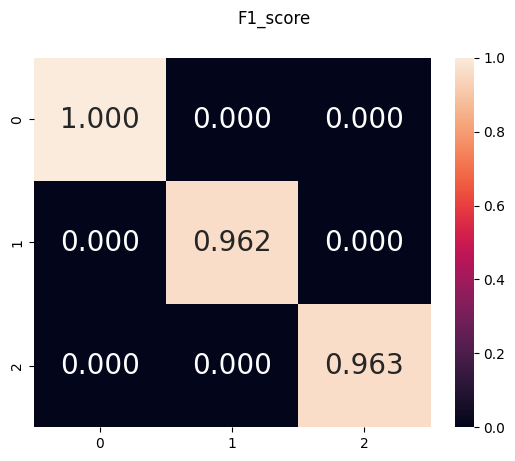

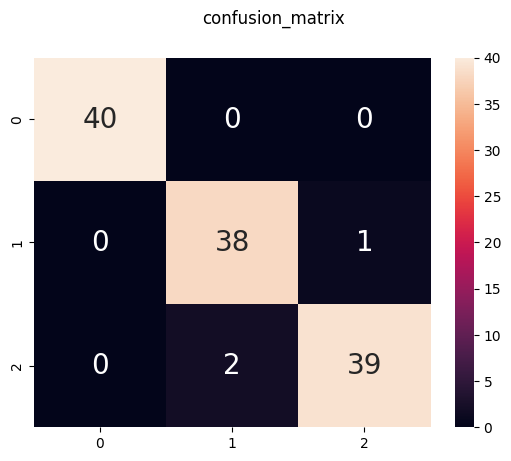

In [120]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(np.diag(f1_score(hxFn(x).argmax(axis=1),y.numpy().argmax(axis=1),average=None)),
            annot=True,
        annot_kws={"size": 20},
        fmt=".3f"
)
plt.suptitle('F1_score')
plt.show()

sns.heatmap(
    confusion_matrix(hxFn(x).argmax(axis=1),y.numpy().argmax(axis=1)),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.suptitle('confusion_matrix')
plt.show()

In [128]:
# 2 tf_high
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.nn import sigmoid

#####
x = tf.constant(x_train_ssc, tf.float32)
y = tf.constant(y_train.values, tf.float32)

model = Sequential()
model.add(Dense(units=3, input_dim=4, activation='sigmoid'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['acc']
)
model_hist = model.fit(x_train_ssc,y_train.values,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9566 - acc: 0.5167
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5089 - acc: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3996 - acc: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3423 - acc: 0.8583
Epoch 5/100
1/4 [======>.......................] - ETA: 0s - loss: 0.3628 - acc: 0.8438

2022-12-02 14:18:30.985841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 7ms/step - loss: 0.3008 - acc: 0.8750
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2673 - acc: 0.9083
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2386 - acc: 0.9167
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2114 - acc: 0.9417
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1919 - acc: 0.9500
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1792 - acc: 0.9583
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1675 - acc: 0.9667
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1574 - acc: 0.9750
Epoch 13/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1489 - acc: 0.9750
Epoch 14/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1427 - acc: 0.9667
Epoch 15/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1367 - acc: 0

In [135]:
y_pred=model.predict(x_test_ssc)

1/1 [==============================] - 0s 14ms/step


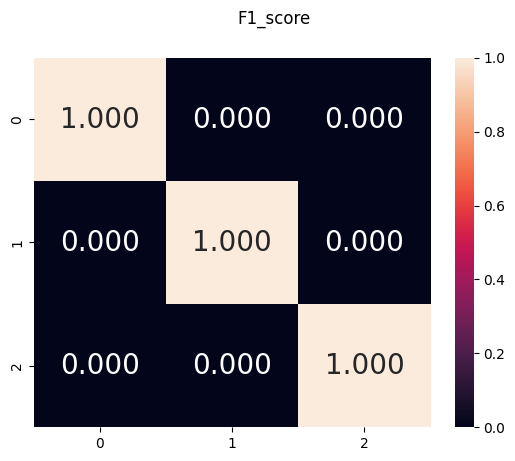

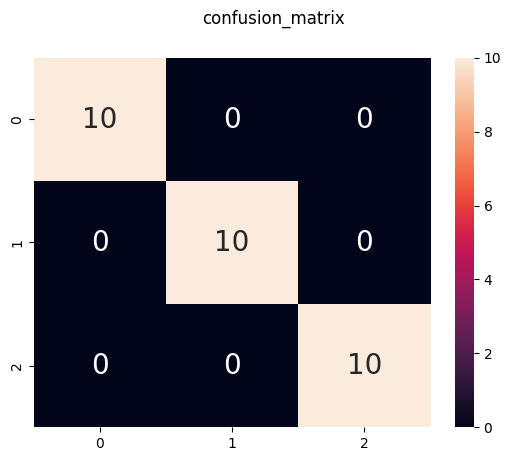

In [136]:
y_pred=y_pred.argmax(axis=1)
y_test=y_test.values.argmax(axis=1)

sns.heatmap(np.diag(f1_score(y_test,y_pred,average=None)),
            annot=True,
        annot_kws={"size": 20},
        fmt=".3f"
)
plt.suptitle('F1_score')
plt.show()

sns.heatmap(
    confusion_matrix(y_test,y_pred),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.suptitle('confusion_matrix')
plt.show()

In [121]:
# 3 torch_low
import torch
from torch.nn import functional as F

#####

x = torch.FloatTensor(x_train_ssc)
y = torch.FloatTensor(y_train.values)

w = torch.empty([x.shape[-1],3],requires_grad=True)
b = torch.empty([3],requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)


def cost():
    z = torch.matmul(x,w) + b
    c_i = F.cross_entropy(z,y)
    c = torch.mean(c_i)
    return c

def hxFn(xdata):
    xd = torch.FloatTensor(xdata)
    z = torch.matmul(xd,w) + b
    hx = torch.softmax(z,dim=1)
    return hx

optimizer = torch.optim.Adam([w,b],lr=0.1)

for i in range(1000):
    c=cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    acc = accuracy_score(y_train.values.argmax(axis=1)
                         ,hxFn(x_train_ssc).argmax(dim=1).detach().numpy())
    print(f'epoch => {i} / cost => {cost().item()} acc => {acc} ')

f1_score :  [1.    0.975 0.975]


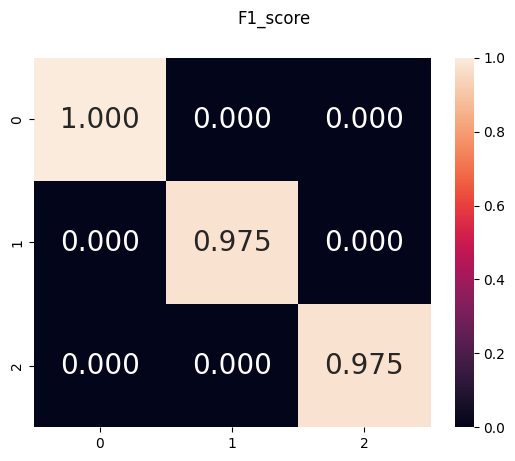

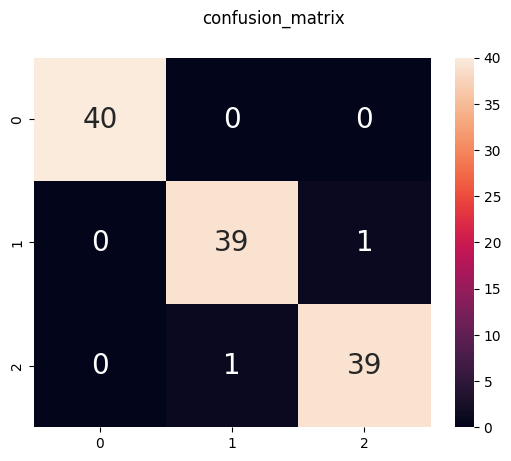

[5.1,3.5,1.4,0.2] => Iris Setosa


In [123]:
print("f1_score : ",f1_score(y_train.values.argmax(axis=1)
                             ,hxFn(x_train_ssc).argmax(dim=1).detach().numpy(),average=None))

sns.heatmap(np.diag(f1_score(y_train.values.argmax(axis=1),hxFn(x_train_ssc).argmax(dim=1).detach().numpy(),average=None)),
            annot=True,
        annot_kws={"size": 20},
        fmt=".3f"
)
plt.suptitle('F1_score')
plt.show()

sns.heatmap(
    confusion_matrix(y_train.values.argmax(axis=1),
                     hxFn(x_train_ssc).argmax(dim=1).detach().numpy()),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.suptitle('confusion_matrix')
plt.show()

test=np.array([5.1,3.5,1.4,0.2])
test_ssc = ssc.transform(test.reshape(1,-1))

my_dict = {
    0:'Iris Setosa',
    1:'Iris Versicolor',
    2:'Iris Virginica'
}

print('[5.1,3.5,1.4,0.2] =>' , my_dict[hxFn(test_ssc).argmax(dim=1).detach().numpy()[0]])

In [140]:
# 4 torch high



import torch
from torch.nn import Linear, Sequential
from torch.nn import Softmax, CrossEntropyLoss


x = torch.FloatTensor(x_train_ssc)
y = torch.FloatTensor(y_train.values)

model = Sequential()
model.add_module('ln_1',Linear(4,3))
model.add_module('soft_1',Softmax(dim=1))
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for _iter_ in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x)
    c = loss_fn(hx,y)
    c.backward()
    optimizer.step()
    print(f'_iter_ => {_iter_} / cost => {c.item()}')

_iter_ => 0 / cost => 1.243341326713562
_iter_ => 1 / cost => 1.1515086889266968
_iter_ => 2 / cost => 1.0595258474349976
_iter_ => 3 / cost => 0.9746843576431274
_iter_ => 4 / cost => 0.8994282484054565
_iter_ => 5 / cost => 0.8444889783859253
_iter_ => 6 / cost => 0.8120326399803162
_iter_ => 7 / cost => 0.7935189604759216
_iter_ => 8 / cost => 0.7814317941665649
_iter_ => 9 / cost => 0.7721132040023804
_iter_ => 10 / cost => 0.7640532851219177
_iter_ => 11 / cost => 0.7566357254981995
_iter_ => 12 / cost => 0.7496113181114197
_iter_ => 13 / cost => 0.7428895235061646
_iter_ => 14 / cost => 0.736445963382721
_iter_ => 15 / cost => 0.7302784323692322
_iter_ => 16 / cost => 0.7243867516517639
_iter_ => 17 / cost => 0.7187627553939819
_iter_ => 18 / cost => 0.7133891582489014
_iter_ => 19 / cost => 0.7082391977310181
_iter_ => 20 / cost => 0.7032803893089294
_iter_ => 21 / cost => 0.6984773874282837
_iter_ => 22 / cost => 0.6937960386276245
_iter_ => 23 / cost => 0.6892069578170776
_ite

In [144]:
y_pred=model.forward(torch.FloatTensor(x_test_ssc)).argmax(dim=1)

f1_score :  [1. 1. 1.]


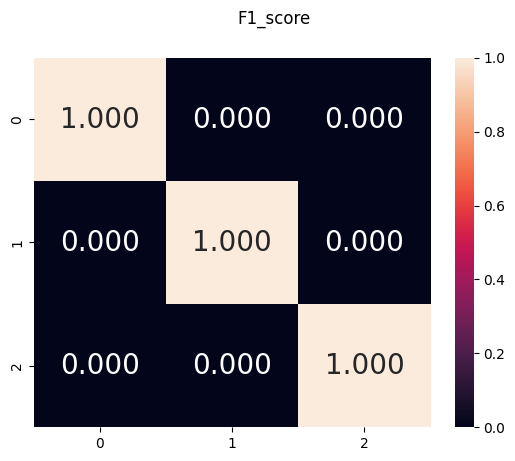

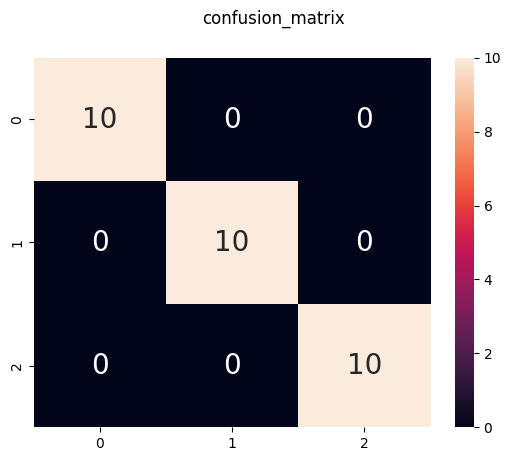

[5.1,3.5,1.4,0.2] => Iris Setosa


In [156]:
print("f1_score : ",f1_score(y_test,y_pred,average=None))

sns.heatmap(np.diag(f1_score(y_test,y_pred,average=None)),
            annot=True,
        annot_kws={"size": 20},
        fmt=".3f"
)
plt.suptitle('F1_score')
plt.show()

sns.heatmap(
    confusion_matrix(y_test,
                     y_pred),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.suptitle('confusion_matrix')
plt.show()

test=np.array([5.1,3.5,1.4,0.2])
test_ssc = ssc.transform(test.reshape(1,-1))

my_dict = {
    0:'Iris Setosa',
    1:'Iris Versicolor',
    2:'Iris Virginica'
}


print('[5.1,3.5,1.4,0.2] =>' , my_dict[model.forward(torch.FloatTensor(test_ssc)).argmax(dim=1).numpy()[0]])